In [36]:
import numpy as np  
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd


import keras
import tensorflow as tf

from sklearn.metrics import r2_score, mean_squared_error

## Regressão Linear

### Regressão Linear Simples

In [2]:
# Your dataset
altura      = np.array([1.087, 1.613, 0.953, 1.003, 1.156, 0.978, 1.092, 0.572, 0.940, 0.597, 0.838, 1.473])
comprimento = np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])

Problema: Dado uma altura n ̃ao presente na tabela, qual
dever ́a ser o comprimento do cateter?

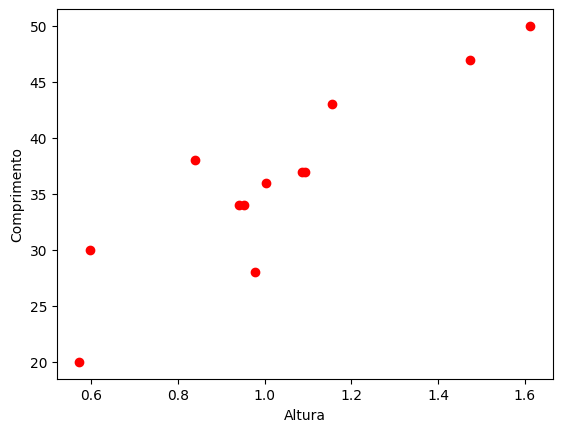

In [3]:
plt.plot(altura, comprimento, 'ro')
plt.xlabel('Altura')
plt.ylabel('Comprimento')
plt.show()

• A coluna Altura é a entrada do nosso modelo.

• A coluna Comprimento é a sa ́ıda do nosso modelo.

• Nosso conjunto de dados é formado por 12 alturas e 12
comprimentos correspondentes.

• Matematicamente, temos:
$D = \{(x1,y1),··· ,(x2,y2)\}= \{(xi ,yi )\}_{12i}=1$,
em que $x_i$  ́e a i - ́esima entrada e yi  ́e a i - ́esima sa ́ıda.

• Objetivo: Encontrar uma relação entre xi e yi que forne ̧ca uma
predicao $\bar yi$ o mais proximo poss ́ıvel da saida real y

#### Terminologia

* **Features :** Variavel explicativa
* **Target  :** Variavel resposta
* **Modelo  :**
* **Função Objetivo:** Indica o quão mal (ou o
quão bem) um modelo aproxima os dados disponíveis.


#### Modelo
$y_i =  w_0 + w_1 x_i$

Quero minimizar error do valor real e valor predito

$$ J = \min_{w_0, w_1} \frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$$

> Para minimizar o error quadrático médio do valor predito e real será feito o metodo da descida o gradiente, para tal derivamos em relação a $w_0$ e $w_1$

`W_0`

$\large \frac{\partial J}{\partial w_0}$

$\frac{\partial J}{\partial w_0} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$

$\frac{\partial J}{\partial w_0} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1)$
* Corta o 2

$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1)$


$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1)$


$\frac{\partial J}{\partial w_0} =  -1\cdot\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1x_i)$

$E_{w_0} = \frac{\partial J}{\partial w_0}$

`W_1`

$\large \frac{\partial J}{\partial w_1}$

$\frac{\partial J}{\partial w_1} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)^2$

$\frac{\partial J}{\partial w_1} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-w_1)$
* Corta o 2

$\frac{\partial J}{\partial w_1} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1*w_1)$

$\frac{\partial J}{\partial w_1} =  -\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(x_i)$

$E_{w1} = \frac{\partial J}{\partial w_1}$

#### Gradiente descente

```pseudo
alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_ITER:
    w_0 <- w_0 + alpha * E_w0 
    w_1 <- w_1 + alpha * E_w1

    loss <- loss_fn(ytrue, ypred) 
```

In [15]:
class ModeloSimples(tf.Module):
    def __init__(self, name='Modelo'):
        super().__init__(name)
        self.intercept = tf.Variable(1, dtype=tf.float32)
        self.coef_     = tf.Variable( abs(np.random.normal()), dtype=tf.float32)
    
    def call(self, X):
        return self.intercept + tf.multiply(X, self.coef_)

In [24]:
def GD(X, y, model ,learning_rate=0.01, max_epochs=100, verbose=False):

    X = X.reshape(-1, 1) if len(X.shape) == 1 else X
    y = y.reshape(-1, 1) if len(y.shape) == 1 else y
    

    # Definindo a função de perda
    loss = tf.keras.losses.MeanSquaredError()
    listLoss = []
    for i in range(1, max_epochs + 1):
        pred = model.call(X)
        # Atualizando o coeficiente : w = w - lr * np.mean((y - w * x) * x)
        derW1 = 1 * learning_rate * np.mean((y - pred) * X)
        model.coef_ = model.coef_ + tf.Variable(derW1, dtype=tf.float32) 
            

        # Atualizando o intercept : w = w - lr * np.mean(y - w * x) 
        derW0 = 1 * learning_rate * np.mean(y - pred)
        model.intercept = model.intercept + tf.Variable(derW0, dtype=tf.float32) 
            
        loss_ = loss(y, pred)
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
        listLoss.append(loss_)

    return model, listLoss

In [25]:
model = ModeloSimples()

In [26]:
modelGB, listLoss = GD(
    altura, comprimento, model, 
    verbose   =True, 
    max_epochs=100
    )

Epoch 10 - Loss: 880.7771606445312
Epoch 20 - Loss: 582.032470703125
Epoch 30 - Loss: 386.4104919433594
Epoch 40 - Loss: 258.3117980957031
Epoch 50 - Loss: 174.4266815185547
Epoch 60 - Loss: 119.4918441772461
Epoch 70 - Loss: 83.5134506225586
Epoch 80 - Loss: 59.94752502441406
Epoch 90 - Loss: 44.50913619995117
Epoch 100 - Loss: 34.3925895690918


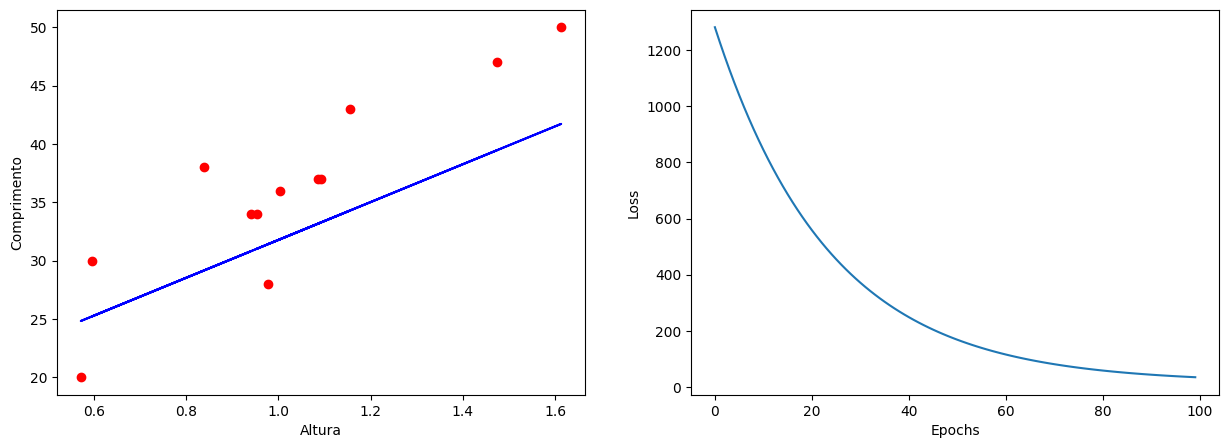

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(altura, comprimento, 'ro')
plt.plot(altura, modelGB.call(altura), 'b')
plt.xlabel('Altura')
plt.ylabel('Comprimento')

plt.subplot(1,2,2)
plt.plot(listLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


```pseudo
Gradiente descendente Estocatico

alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_EPOCAS:
    XI <- X(PERMUTAÇÃO)
    YI <- Y(PERMUTAÇÃO)
    PARA J EM 1 ATÉ N_INSTANCIA:
        w_0 <- w_0 + alpha * Ei_w0
        w_1 <- w_1 + alpha * Ei_w1(xi)

    loss <- loss_fn(ytrue, ypred) 

```

In [46]:
def SGD(X, y, model ,learning_rate=0.01, max_epochs=100, verbose=False):

    X = X.reshape(-1, 1) if len(X.shape) == 1 else X
    y = y.reshape(-1, 1) if len(y.shape) == 1 else y

    # Definindo a função de perda
    loss = tf.keras.losses.MeanSquaredError()
    listLost = []

    for i in range(1, max_epochs + 1):
        xPer = tf.cast(tf.random.shuffle(X), dtype=tf.float32)
        yPer = tf.cast(tf.random.shuffle(y), dtype=tf.float32) # shuffle 

        # Loss
        lossListi = []   
        for xi, yi in zip(xPer, yPer):
            # Predizendo 
            predict = model.call(xi)
            
            derW1 = 1 * learning_rate * (( yi - predict ) * xi)
           
            model.coef_ = model.coef_ + tf.Variable(derW1)  
            

            derW0 = 1 * learning_rate * (yi - predict)
            model.intercept = model.intercept + tf.Variable(derW0) 
            
            lossListi.append(loss(yi, predict))
        listLost.append(np.mean(lossListi))

        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {np.mean(lossListi)}')
    return model, listLost

In [47]:
model = ModeloSimples()
modelSGB, listLoss = SGD(altura, comprimento, model, max_epochs=100, verbose=False)

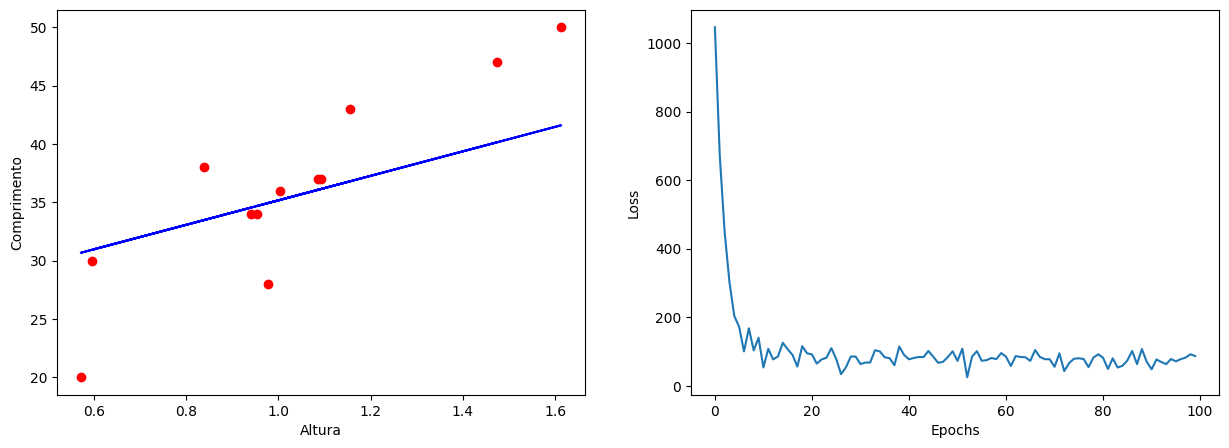

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(altura, comprimento, 'ro')
plt.plot(altura, modelSGB.call(altura), 'b')
plt.xlabel('Altura')
plt.ylabel('Comprimento')

plt.subplot(1,2,2)    
plt.plot(listLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Regressão Linear Multipla

In [49]:
altura = [1.087, 1.613, 0.953, 1.003, 1.156, 0.978, 1.092, 0.572, 0.940, 0.597, 0.838, 1.473]
peso   = [18.141, 42.404, 16.100, 13.605, 23.583, 7.710, 17.460, 3.855, 14.966, 4.308, 9.524, 35.828]
comprimento = [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]


altura, peso, comprimento = np.array(altura), np.array(peso), np.array(comprimento)

In [50]:
fig = px.scatter_3d(x=altura, y=peso, z=comprimento)
fig.show()

In [51]:
class Modelo(tf.Module):
    def __init__(self, name='ModeloMultilpo', nCol=2):
        super().__init__(name)
        
        # Definindo o interceptor
        self.intercept = tf.Variable(
            initial_value = 1, 
            dtype = tf.float32,
            name  ='Interceptor'
        )

        # Definindo o coeficiente
        self.coef_ = tf.Variable( 
            initial_value = abs(np.random.randn(nCol, 1)), 
            dtype = tf.float32,
            name  = 'Coeficiente'
            )
    def call(self, X):
        return tf.matmul(X, self.coef_) + model.intercept

In [ ]:
def SGD(X, y, model, learning_rate=0.01, max_epochs=100, verbose=False):
    loss = tf.keras.losses.MeanSquaredError()
    y = y.reshape(-1, 1) if len(y.shape) == 1 else y
    
    # N
    N = np.size(y, 0)
    for i in range(1, max_epochs + 1):
        xPer = tf.random.shuffle(X)
        yPer = tf.random.shuffle(y)

        for i in range(N):
            X_   = tf.cast(tf.reshape(xPer[i, :], (1, -1)), tf.float32)
            y_i  = tf.cast(yPer[i, :], tf.float32)
            pred = tf.cast(model.call(X_), tf.float32)
            
            derW1 = 1 * learning_rate * tf.reduce_mean((y_i - pred) * X_)
            
            model.coef_ = model.coef_ + tf.Variable(derW1, dtype=tf.float32)  
            

            derW0 = 1 * learning_rate * tf.reduce_mean(y_i - pred)
            model.intercept = model.intercept + tf.Variable(derW0, dtype=tf.float32) 
            
        
    return model

In [56]:
X = np.c_[altura, peso].astype(np.float32)

In [ ]:
model = Modelo(nCol=2)
modelSGB = SGD(X, comprimento, model, verbose=True, max_epochs=1000)

<tf.Variable 'Coeficiente:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5992875 ],
       [0.14621328]], dtype=float32)> tf.Tensor(0.8341525, shape=(), dtype=float32)
tf.Tensor(
[[1.43344  ]
 [0.9803658]], shape=(2, 1), dtype=float32) tf.Tensor(2.4749062, shape=(), dtype=float32)
tf.Tensor(
[[3.9083462]
 [3.455272 ]], shape=(2, 1), dtype=float32) tf.Tensor(-17.38813, shape=(), dtype=float32)
tf.Tensor(
[[-13.479784]
 [-13.932858]], shape=(2, 1), dtype=float32) tf.Tensor(28.905632, shape=(), dtype=float32)
tf.Tensor(
[[15.425848]
 [14.972774]], shape=(2, 1), dtype=float32) tf.Tensor(-40.53343, shape=(), dtype=float32)
tf.Tensor(
[[-25.10758 ]
 [-25.560654]], shape=(2, 1), dtype=float32) tf.Tensor(2.9311492, shape=(), dtype=float32)
tf.Tensor(
[[-22.176432]
 [-22.629505]], shape=(2, 1), dtype=float32) tf.Tensor(36.379898, shape=(), dtype=float32)
tf.Tensor(
[[14.203466]
 [13.750393]], shape=(2, 1), dtype=float32) tf.Tensor(-5.799018, shape=(), dtype=float32)
tf.Tensor(
[[8.4044485]
 [7

In [58]:
modelSGB.call(X)

<tf.Tensor: shape=(12, 1), dtype=float32, numpy=
array([[33244.75 ],
       [78092.7  ],
       [29309.725],
       [24886.307],
       [43215.16 ],
       [14175.961],
       [32021.746],
       [ 6466.869],
       [27234.59 ],
       [ 7331.667],
       [17204.463],
       [65942.195]], dtype=float32)>

&nbsp;

### Meus Modelos Padrões

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
class Modelo(tf.Module):
    def __init__(self, name='Modelo', shape=(1,1)):
        super().__init__(name)
        
        # Definindo o interceptor
        self.intercept = tf.Variable(
            initial_value = 1, 
            dtype = tf.float32,
            name  ='Interceptor'
        )

        # Definindo o coeficiente
        self.coef_ = tf.Variable( 
            initial_value = abs(np.random.randn(*shape)), 
            dtype = tf.float32,
            name  = 'Coeficiente')
    
    def call(self, inputs): 
        # Tratando o input de acordo com a sua dimensão
        inputs = inputs.reshape(-1, 1) if len(inputs.shape) == 1 else inputs

        return tf.multiply(inputs, self.coef_) + self.intercept

In [40]:
def SGD(X, y, model, learning_rate=0.01, max_epochs=100, verbose=False):
    # Definindo o otimizador
    optim = keras.optimizers.SGD(learning_rate=learning_rate)

    # Definindo a função de perda
    loss  = tf.keras.losses.MeanSquaredError()
    
    
    for i in range(1, max_epochs + 1):
        with tf.GradientTape() as tape:
            ypred = model.call(X)
            loss_  = loss(y, ypred)

        gradient = tape.gradient(loss_, model.trainable_variables)
        optim.apply_gradients(zip(gradient, model.trainable_variables))
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
    
    return model

In [41]:
altura.shape

(12,)

In [42]:
model = Modelo(shape=(12, 1))

In [43]:
modelSGB = SGD(altura, comprimento, model, max_epochs=1000)

In [44]:
pred = modelSGB.call(altura).numpy()

In [45]:
print(f'Coeficiente: {modelSGB.coef_}\nIntercept: {modelSGB.intercept}\nR2: {r2_score(comprimento, pred)}\nMSE: {mean_squared_error(comprimento, pred)}')

Coeficiente: <tf.Variable 'Coeficiente:0' shape=(12, 1) dtype=float32, numpy=
array([[ 5.014743  ],
       [11.702763  ],
       [ 2.906132  ],
       [ 4.4498577 ],
       [ 9.513426  ],
       [-2.0828393 ],
       [ 5.0742016 ],
       [-7.258162  ],
       [ 3.0455873 ],
       [-0.04576427],
       [ 6.386311  ],
       [10.674611  ]], dtype=float32)>
Intercept: <tf.Variable 'Interceptor:0' shape=() dtype=float32, numpy=30.723934173583984>
R2: 0.9289578795433044
MSE: 4.355274740832101


`Modelo customizado`

In [ ]:
def SGD(X, y, model, optim = keras.optimizers.SGD(learning_rate=0.01), loss = tf.keras.losses.MeanSquaredError(), max_epochs=100, verbose=False):   

    X = X.reshape(-1, 1) if len(X.shape) == 1 else X
    
    for i in range(1, max_epochs + 1):
        with tf.GradientTape() as tape:
            ypred = model.call(X)
            loss_  = loss(y, ypred)

        gradient = tape.gradient(loss_, model.trainable_variables)
        optim.apply_gradients(zip(gradient, model.trainable_variables))
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
    
    return model